## Student Performance Indicator

### Life cycle of machine learning

- Understand the problem statement
- Data collection
- Data checks to perform
- Data pre-processing
- Model training
- Choosing best model

### 1) Problem statement

- This project understands how the student's performance (test scores)
is affected by other variables such as gender, ethnicity, parental level of education, lunch and test preparation course

### 2) Data collection

- dataset source - kaggle "student performance in exam id-74977
- The data consists of 8 columns and 1000 rows
-  [Github raw data link](https://raw.githubusercontent.com/tarun9804/misc/main/Datasets/Regression/StudentsPerformance.csv)

### Importing required libraries and data

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/tarun9804/misc/main/Datasets/Regression/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.rename(columns={'math score':'math_score','reading score':'reading_score','writing score':'writing_score'},inplace=True)

In [5]:
df.shape

(1000, 8)

### Data checks to be performed

- Missing values
- Duplicates
- Data types
- number of unique values of each column
- statistics of data set
- various categories present in the different categorical column

#### missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

isnull is an alias of isna

**observation: There are no missing values**

#### check Duplicates 

In [9]:
df.duplicated().sum()

0

**Observation: No duplicates found**

#### check Data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**5 categorical column, 3 numerical column**

#### check for number of unique values

In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### statistics of data

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Observation**:
- means of scores are nearby to each other
- min max have differences

#### exploring categorical columns

In [19]:
for i in df.select_dtypes(include='object').columns:
    print(i,':',df[i].unique())

gender : ['female' 'male']
race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test preparation course : ['none' 'completed']


#### Feature engineering
- adding total score and avg score column

In [50]:
df=df.assign(Total_score=lambda x:x.math_score + x.reading_score + x['writing_score'])

In [52]:
df['avg_score']=df.Total_score/3

In [53]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'avg_score'],
      dtype='object')

### Exploring data (Visualization)

<Axes: xlabel='avg_score', ylabel='Count'>

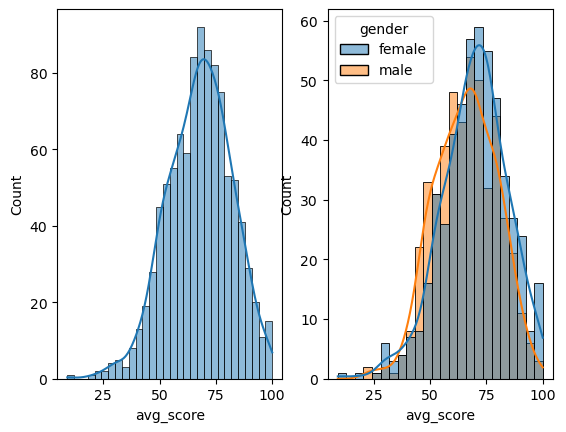

In [59]:
#plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(x=df.avg_score,bins=30,kde=True)
plt.subplot(1,2,2)
sns.histplot(x=df.avg_score,kde=True,hue=df.gender)

<Axes: xlabel='Total_score', ylabel='Count'>

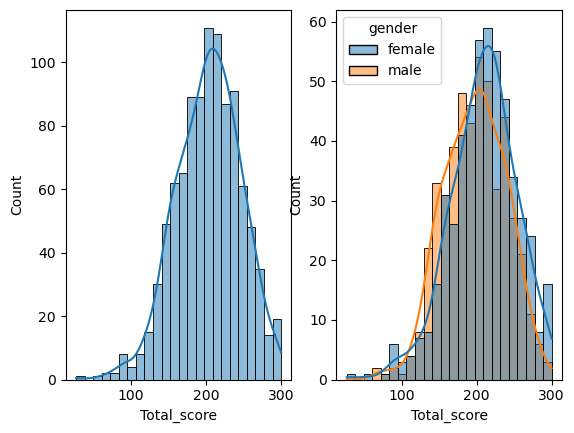

In [60]:
plt.subplot(1,2,1)
sns.histplot(x=df.Total_score,kde=True)
plt.subplot(1,2,2)
sns.histplot(x=df.Total_score,kde=True,hue=df.gender)

**observation: gender has influence on total score**

<Axes: xlabel='Total_score', ylabel='Count'>

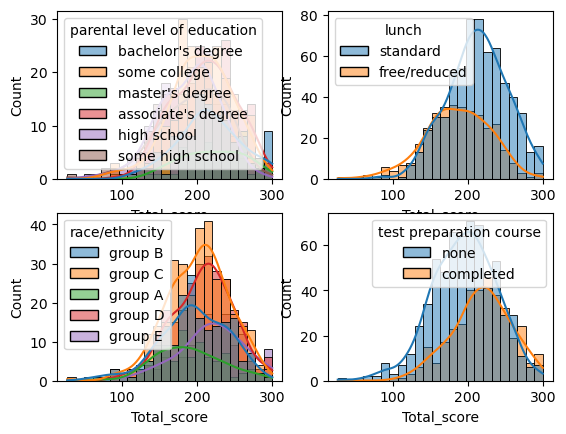

In [63]:
plt.subplot(2,2,1)
sns.histplot(x=df.Total_score,kde=True,hue=df['parental level of education'])
plt.subplot(2,2,2)
sns.histplot(x=df.Total_score,kde=True,hue=df.lunch)
plt.subplot(2,2,3)
sns.histplot(x=df.Total_score,kde=True,hue=df['race/ethnicity'])
plt.subplot(2,2,4)
sns.histplot(x=df.Total_score,kde=True,hue=df['test preparation course'])

             

obs:   
ethnicity/group has diffence in performance   
lunch also has different mean   
test preparation course has effect on total score   

### Multivariate analysis

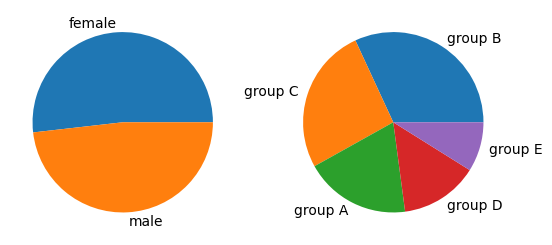

In [70]:
plt.subplot(1,2,1)
plt.pie(df.gender.value_counts(),labels=df.gender.unique())
plt.subplot(1,2,2)
plt.pie(df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].unique())
plt.show()

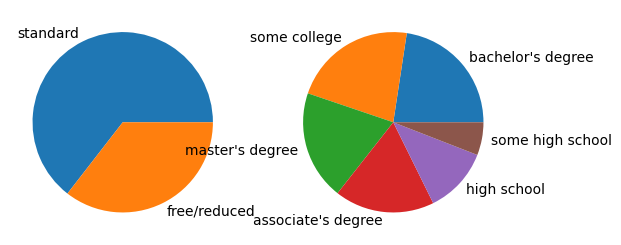

In [71]:
plt.subplot(1,2,1)
plt.pie(df.lunch.value_counts(),labels=df.lunch.unique())
plt.subplot(1,2,2)
plt.pie(df['parental level of education'].value_counts(),labels=df['parental level of education'].unique())
plt.show()

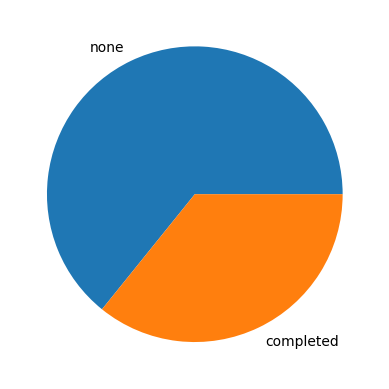

In [73]:
plt.pie(df['test preparation course'].value_counts(),labels=df['test preparation course'].unique())
plt.show()

In [72]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'avg_score'],
      dtype='object')

**obs:**
- number of student in group c is more
- students not enrolled in any test preparation course is more

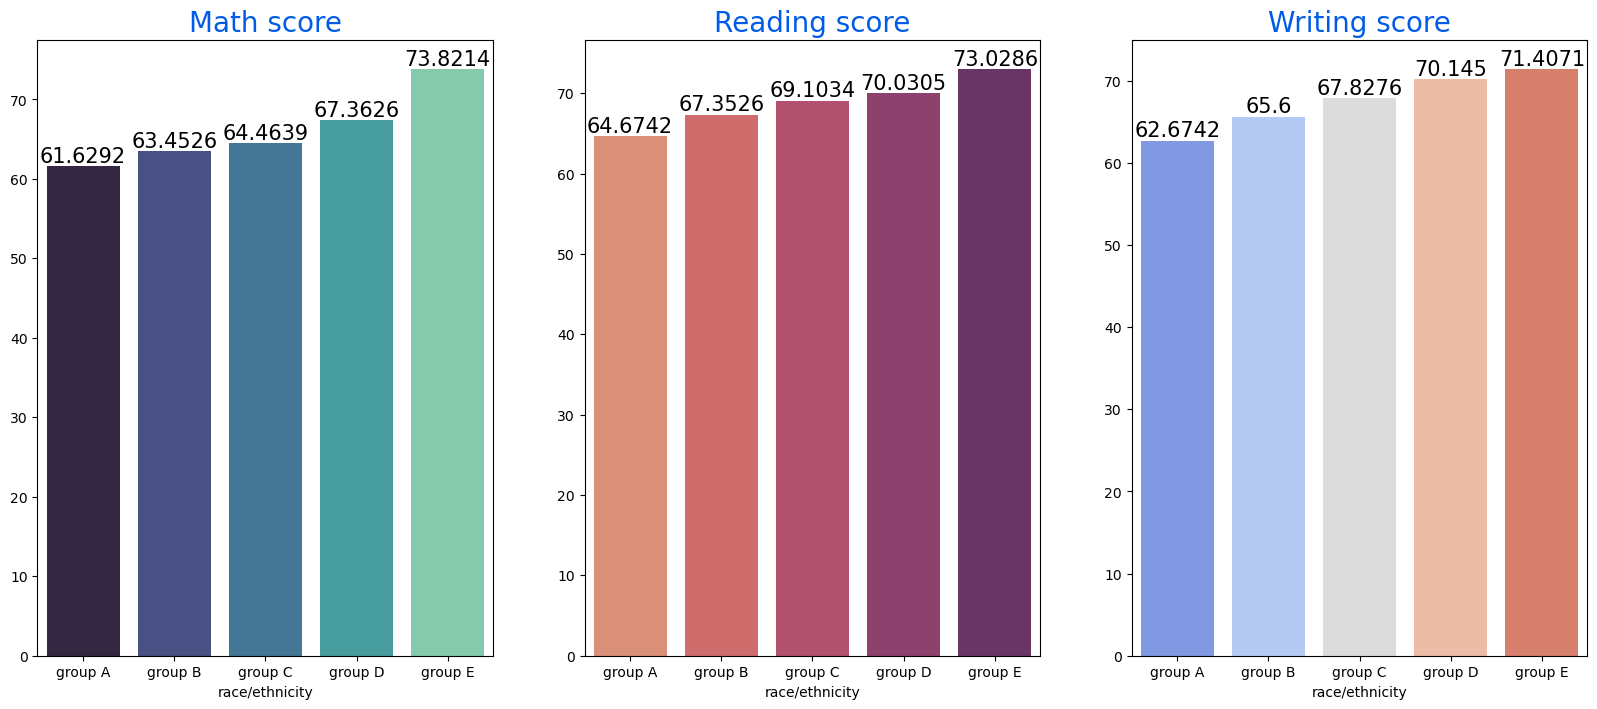

In [83]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### checking Outliers

In [86]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'avg_score'],
      dtype='object')

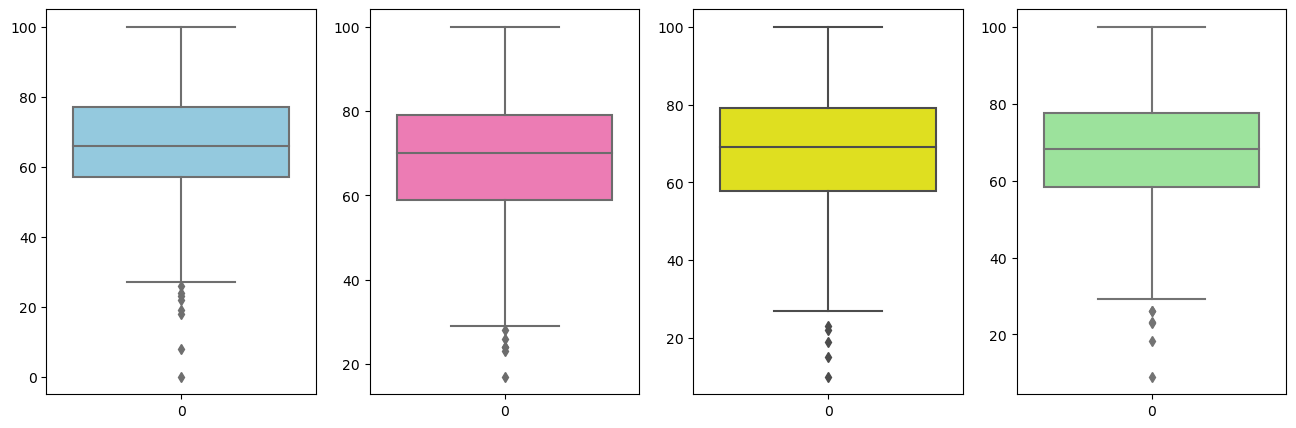

In [87]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()

**Conclusion**  
- Student's Performance is related with lunch, race, parental level education  
- Females lead in pass percentage and also are top-scorers  
- Student's Performance is not much related with test preparation course  
- Finishing preparation course is benefitial.  